In [1078]:
import numpy as np              # Массивы (матрицы, векторы, линейная алгебра)
import matplotlib.pyplot as plt # Научная графика
%matplotlib inline 
    # Говорим jupyter'у, чтобы весь графический вывод был в браузере, а не в отдельном окне
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import seaborn as sns           # Еще больше красивой графики для визуализации данных
import sklearn                  # Алгоритмы машинного обучения

# Возраст Морских Ушек

Таблица содержит данные о более 4 тысяч морских ушках (Abalone). 

Для каждой особи указаны ее пол, длина, диаметр, рост, общий вес, очищенный вес, вес внутренностей и вес скорлупы.

Задача - прогнозирование возраста морского ушка (кол-ва колец Rings) на основе физических измерений.

In [1079]:
url = "https://raw.githubusercontent.com/DKapustin/Abalone/master/abalone.csv"
data_raw = pd.read_csv(url)

Вначале посмотрим на размеры таблицы - количество строк (каждая строка соответствует одной особи) и количество столбцов (каждый столбец соответствует конкретному признаку):

In [1080]:
data_raw.shape

(4177, 9)

Отображаем первые строки таблицы (по умолчанию 5):

In [1081]:
data_raw.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


Отображаем последние строки таблицы (по умолчанию 5):

In [1082]:
data_raw.tail()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10
4176,M,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.4950,12


Столбцы (признаки) имеют имена

* Sex - пол (I - Infant, F - Female, M - Male)
* Length - длина
* Diameter - диаметр
* Height - высота
* Whole weight - общий вес
* Shucked weight - очищенный вес
* Viscera weight - вес внутренностей
* Shell weight - вес скорлупы
* Rings - кол-во колец

Признак  Sex - номинальный (категориальный), остальные признаки (включая целевой признак Rings) - количественный (числовой).

Требуется предсказать количественный признак Rings по остальным признакам.

Получение имен столбцов:

In [1083]:
data_raw.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [1084]:
data_raw.index

RangeIndex(start=0, stop=4177, step=1)

In [1085]:
data_raw['Sex'].dtype

dtype('O')

In [1086]:
data_raw['Sex'] = data_raw['Sex'].astype('category')

In [1087]:
data_raw['Sex'].dtype

CategoricalDtype(categories=['F', 'I', 'M'], ordered=False)

In [1088]:
data_raw.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


Построим диаграмму рассеивания для признаков кол-во колец и длина

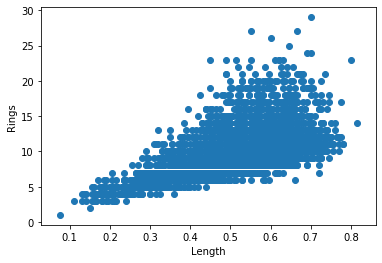

In [1089]:
plt.scatter(data_raw['Length'], data_raw['Rings'])
plt.xlabel('Length')
plt.ylabel('Rings')
pass

Построим диаграмму рассеивания для признаков кол-во колец и общий вес

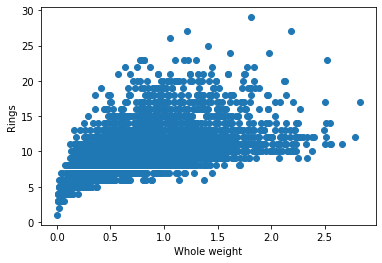

In [1090]:
plt.scatter(data_raw['Whole weight'], data_raw['Rings'])
plt.xlabel('Whole weight')
plt.ylabel('Rings')
pass

На представленных диаграммах рассеивания заметны выбросы - объекты, значения признаков которых, являясь чрезмерно большими и малыми, сильно отличаются от основной массы. Выбросы мешают найти хорошее решение, и с ними рекомендуется бороться.
Для обнаружения выбросов рассмотрим более подробно квантили для признаков кол-во колец и длина.

In [1091]:
data_raw['Rings'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005     4.0
0.010     4.0
0.050     6.0
0.100     6.0
0.500     9.0
0.900    14.0
0.950    16.0
0.990    20.0
0.995    22.0
Name: Rings, dtype: float64

$99.9\%$ всех значений признака 'Rings' находится в диапазоне от $4$ до $22$ (это значения квантилей, соответствующих уровням $0.005$ и $0.995$ соотвтетственно)

In [1092]:
data_raw['Length'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005    0.170
0.010    0.195
0.050    0.295
0.100    0.355
0.500    0.545
0.900    0.660
0.950    0.690
0.990    0.735
0.995    0.750
Name: Length, dtype: float64

$99.9\%$ всех значений 'Length' находится в диапазоне от $0.170$ до $0.750$ (это значения квантилей, соответствующих уровням  0.005  и  0.995  соотвтетственно).
Удалим все строки таблицы, в которых признаки кол-во колец или длина выходят за пределы квантелей 0.005, 0.995.

In [1093]:
rows_to_drop = data_raw[
    (data_raw['Rings'] < data_raw['Rings'].quantile(0.005)) | (data_raw['Rings'] > data_raw['Rings'].quantile(0.995)) | 
    (data_raw['Length']  < data_raw['Length' ].quantile(0.005)) | (data_raw['Length']  > data_raw['Length' ].quantile(0.995))].index
data = data_raw.drop(rows_to_drop)
data.shape

(4118, 9)

In [1094]:
rows_to_drop

Int64Index([ 236,  237,  238,  239,  294,  306,  313,  314,  480,  501,  520,
             526,  674,  678,  694,  696,  719,  720,  894, 1052, 1054, 1207,
            1208, 1209, 1428, 1429, 1762, 1763, 1985, 1986, 1987, 2090, 2108,
            2114, 2115, 2169, 2201, 2209, 2305, 2334, 2335, 2371, 2381, 2436,
            2624, 2625, 2711, 3082, 3149, 3280, 3318, 3472, 3521, 3715, 3801,
            3896, 3899, 3902, 4148],
           dtype='int64')

В результате были удалены 59 строк

# Визуализация

Произведенная корректировка исходных данных отражается в новой сводной таблице 

In [1095]:
data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4118.000000,4118.000000,4118.000000,4118.000000,4118.000000,4118.000000,4118.000000,4118.000000
mean,0.525200,0.408817,0.139790,0.826830,0.358942,0.180243,0.238231,9.914764
std,0.115975,0.096089,0.040863,0.478936,0.217204,0.107124,0.135941,3.065993
min,0.170000,0.105000,0.000000,0.023500,0.008000,0.000500,0.005000,4.000000
25%,0.450000,0.350000,0.115000,0.446625,0.188000,0.094500,0.130500,8.000000
50%,0.545000,0.425000,0.140000,0.799750,0.336000,0.171000,0.233500,9.000000
75%,0.615000,0.480000,0.165000,1.149125,0.500875,0.252000,0.325000,11.000000
max,0.750000,0.615000,1.130000,2.825500,1.351000,0.575000,1.005000,22.000000


Для каждого количественного признака приведены средние значения, стандартное отклонение, минимальное и макимальное значения, медиана и значения квартилей.

Информация о категориальном признаке:

In [1096]:
data.describe(include=['category'])

,Sex
count,4118
unique,3
top,M
freq,1506


Диаграмма рассеивания для признаков 'Rings', 'Length' после корректировки выглядит следующим образом

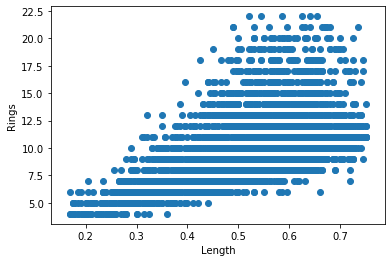

In [1167]:
plt.scatter(data['Length'], data['Rings'])
plt.xlabel('Length')
plt.ylabel('Rings')
pass

Диаграмма рассеивания для признаков 'Rings', 'Whole weight' после корректировки выглядит следующим образом

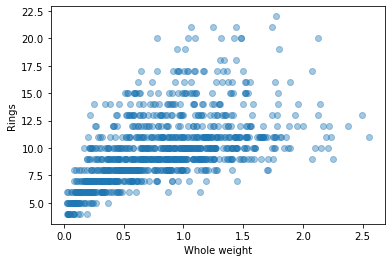

In [1168]:
np.random.seed(42)
random_subset = np.random.choice(np.arange(data.shape[0]), size=1000, replace=False)
plt.scatter(data.iloc[random_subset]['Whole weight'], data.iloc[random_subset]['Rings'], alpha=0.4)
plt.xlabel('Whole weight')
plt.ylabel('Rings')
pass

Построим диаграмму рассеивания для признаков 'Diameter', 'Length'

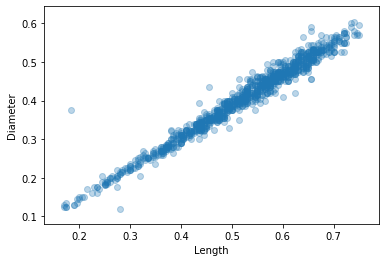

In [1169]:
plt.scatter(data.iloc[random_subset]['Length'], data.iloc[random_subset]['Diameter'], alpha = .3)
plt.xlabel('Length')
plt.ylabel('Diameter')
pass

Из рисунка видно, что между длиной и диаметром есть линейная зависимость.
Для отрисовки диаграммы рассеивания воспользуемся более продвинутой функцией scatterplot из модуля seaborn. Например, в следующей диаграмме цвет маркеров соответствует признаку Пол, а размер - признаку Высота

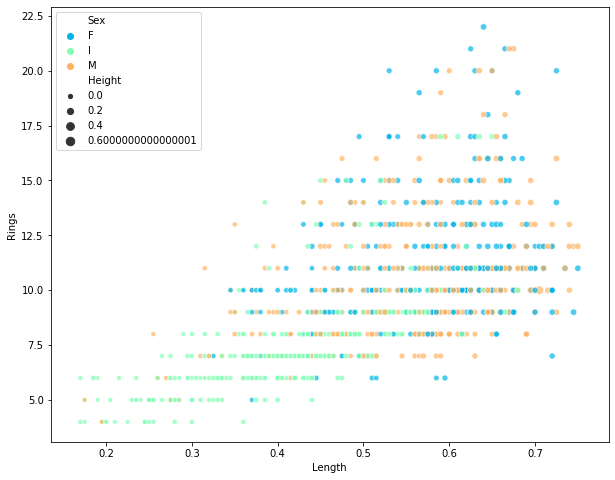

In [1100]:
plt.figure(figsize = (10, 8))
sns.scatterplot(x='Length', y='Rings', size='Height', hue='Sex', data=data.iloc[random_subset], alpha=0.7, palette = "rainbow")
pass

Можно заметить, что Infant сконцентрированы в нижнем левом углу (малые значения длины и кол-ва колец), что было предсказуемо, однако есть и выбросы. Female и Male распределены примерно одинаково.
Построим все возможные диаграммы рассеивания для каждой пары признаков длина, диаметр, высота, общий вес, очищенный вес, вес внутренностей, вес скорлупы, кол-во колец. Цвет маркеров соответствует признаку Пол. На диагонали расположены гистограммы распределения признаков.

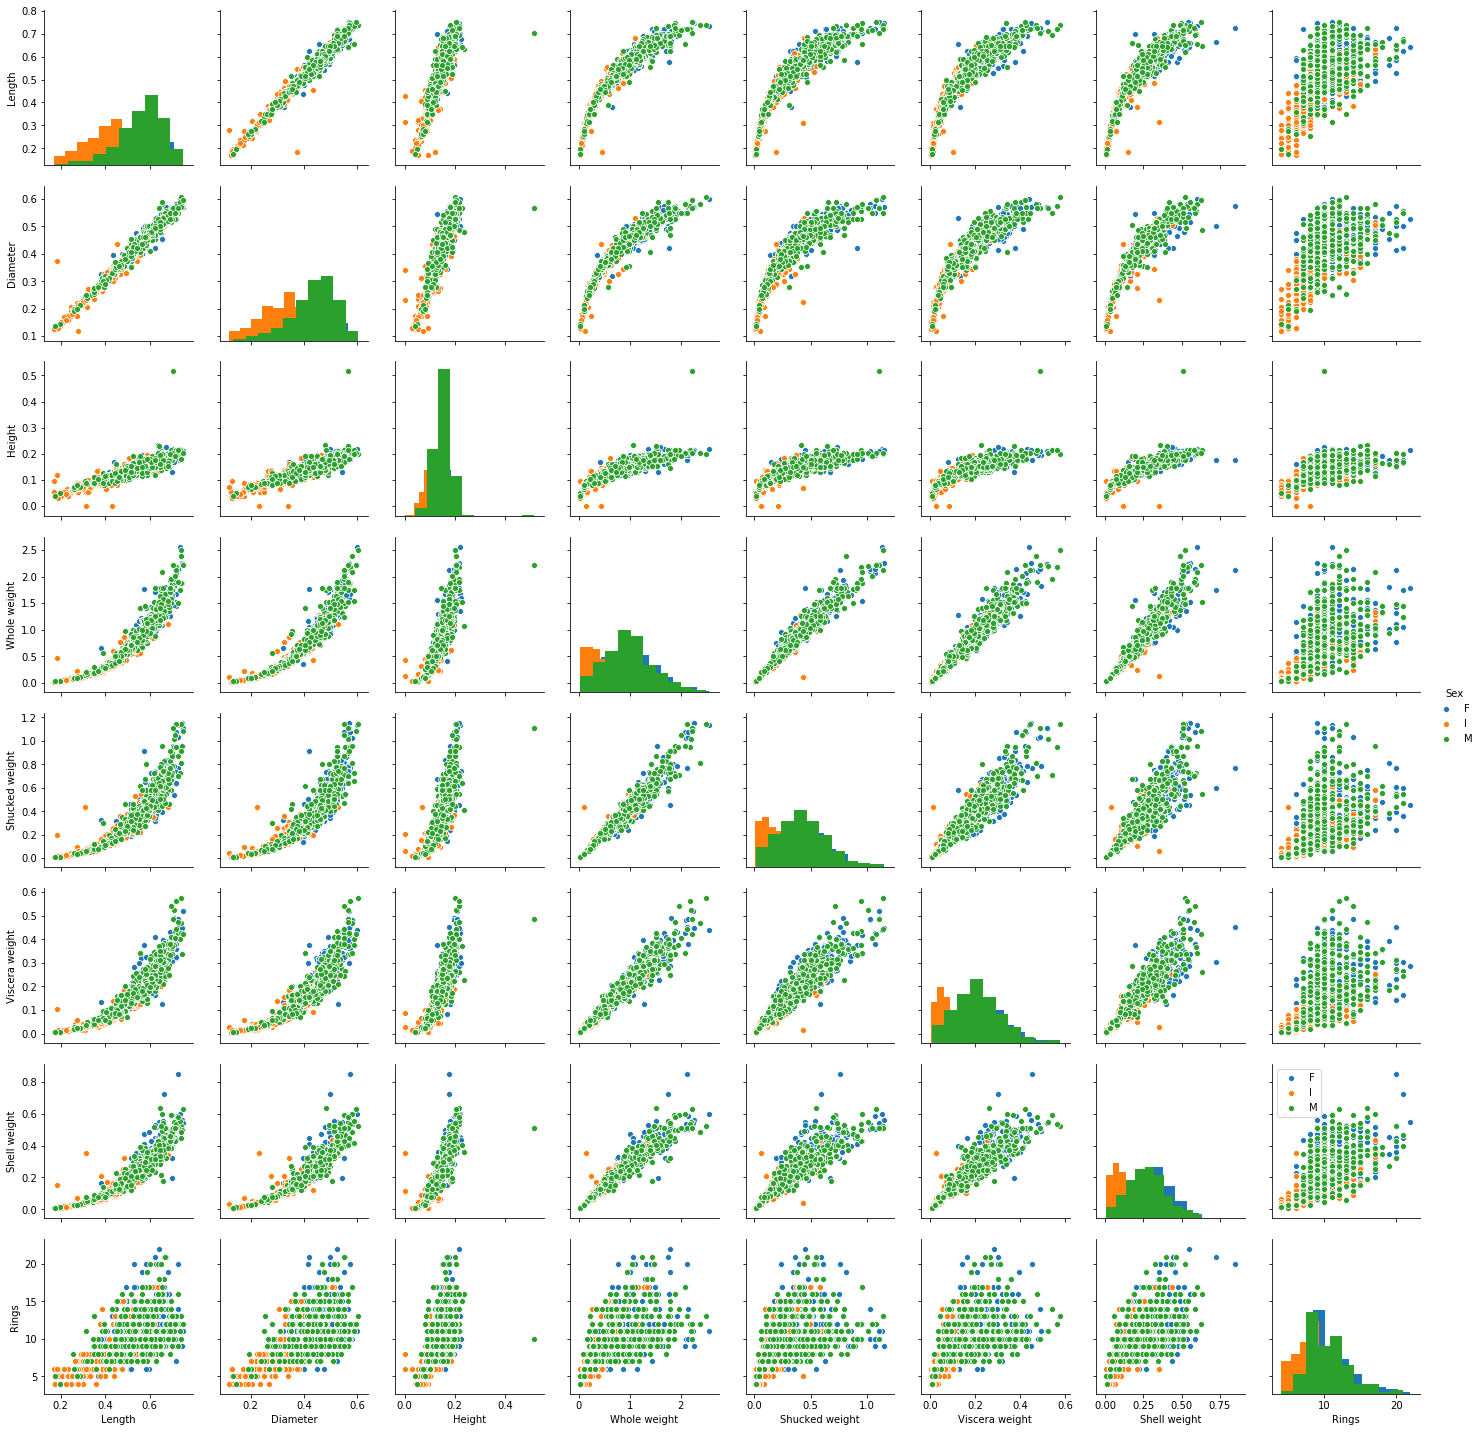

In [1101]:
sns.pairplot(data.iloc[random_subset], hue='Sex', diag_kind='hist')
plt.legend()
pass

С помощю функции distplot из библиотеки seaborn построим отдельные гистограммы.

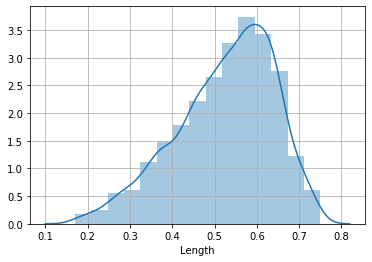

In [1102]:
sns.distplot(data['Length'], bins=15)
plt.grid()
pass

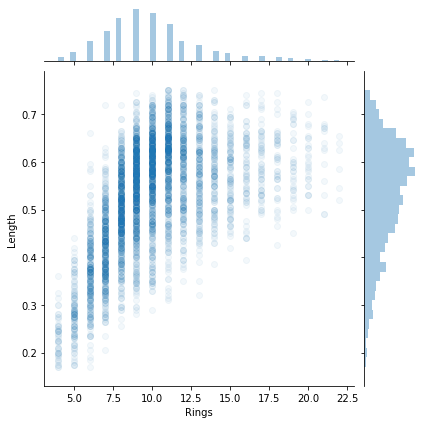

In [1103]:
sns.jointplot(x='Rings', y='Length', alpha=.05, data=data)
pass

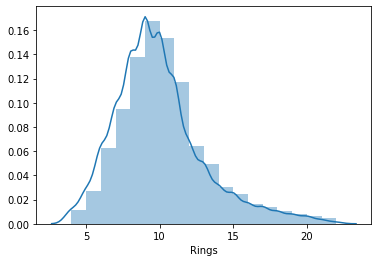

In [1104]:
sns.distplot(data['Rings'], bins = 18)
pass

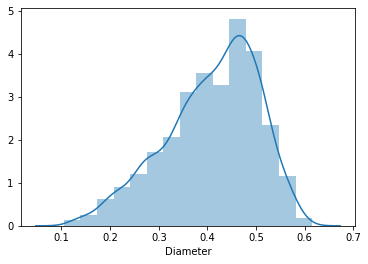

In [1105]:
sns.distplot(data['Diameter'], bins = 15)
pass

Рассмотрим другой способ визуального представления распределения - бокс-диаграмму (ящик с усами). Нижний и верхний концы ящика соответствуют 1-ому и 3-ему квартилям (25% и 75%), а горизонтальная линия внутри ящика - медиане. Верхний ус продолжается вверх вплоть до максимального значения, но не выше 1.5 межквартильного расстояния от верхней кромки ящика. Нижний ус продолжается вниз до минимального значения, но не ниже 1.5 межквартильных расстояний от нижней кромки ящика. На концах усов ставятся небольшие зарубки. За пределами усов значения изображаются в виде отдельных точек - эти значения можно считать выбросами.

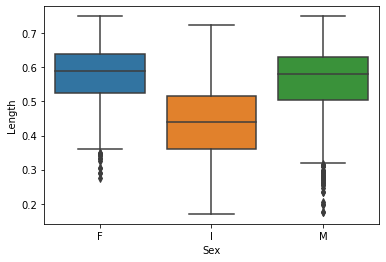

In [1106]:
sns.boxplot(x="Sex", y="Length", data=data)
pass

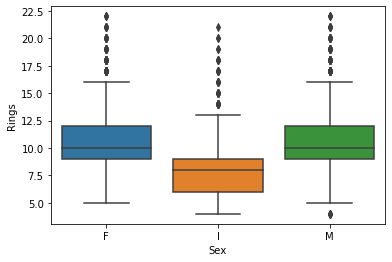

In [1107]:
sns.boxplot(x="Sex", y="Rings", data=data)
pass

Также информацию о характере распределения можно получить из скрипичных графиков (violin plots). В этом случае изображают графики аппроксимации плотности вероятности.

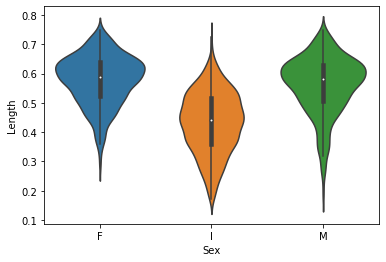

In [1108]:
sns.violinplot(x="Sex", y="Length", data=data)
pass


Вычислим матрицу корреляции для количественных признаков

In [1109]:
corr_mat = data.corr()
corr_mat

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.985927,0.817540,0.929677,0.902228,0.906977,0.901238,0.549333
Diameter,0.985927,1.000000,0.823879,0.929111,0.896362,0.902781,0.908659,0.568091
Height,0.817540,0.823879,1.000000,0.815836,0.771595,0.795319,0.812698,0.546353
Whole weight,0.929677,0.929111,0.815836,1.000000,0.969066,0.965325,0.955105,0.537052
Shucked weight,0.902228,0.896362,0.771595,0.969066,1.000000,0.929701,0.882074,0.419224
Viscera weight,0.906977,0.902781,0.795319,0.965325,0.929701,1.000000,0.907386,0.503254
Shell weight,0.901238,0.908659,0.812698,0.955105,0.882074,0.907386,1.000000,0.622302
Rings,0.549333,0.568091,0.546353,0.537052,0.419224,0.503254,0.622302,1.000000


Удобно использовать визуальный образ этой матрицы. Чем светлее ячейка, тем больше по абсолютной величине коэффициент корреляции

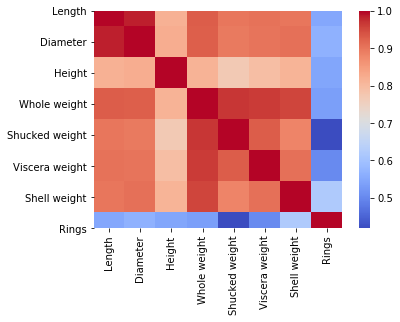

In [1110]:
sns.heatmap(corr_mat, square=True, cmap='coolwarm')
pass

Выведем коэффициенты корреляции, большие заданного значения (0.85):

In [1111]:
corr_mat > 0.85

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,True,True,False,True,True,True,True,False
Diameter,True,True,False,True,True,True,True,False
Height,False,False,True,False,False,False,False,False
Whole weight,True,True,False,True,True,True,True,False
Shucked weight,True,True,False,True,True,True,True,False
Viscera weight,True,True,False,True,True,True,True,False
Shell weight,True,True,False,True,True,True,True,False
Rings,False,False,False,False,False,False,False,True


In [1112]:
corr_mat.where(np.triu(corr_mat > 0.85, k=1)).stack().sort_values(ascending=False)

Length          Diameter          0.985927
Whole weight    Shucked weight    0.969066
                Viscera weight    0.965325
                Shell weight      0.955105
Shucked weight  Viscera weight    0.929701
Length          Whole weight      0.929677
Diameter        Whole weight      0.929111
                Shell weight      0.908659
Viscera weight  Shell weight      0.907386
Length          Viscera weight    0.906977
Diameter        Viscera weight    0.902781
Length          Shucked weight    0.902228
                Shell weight      0.901238
Diameter        Shucked weight    0.896362
Shucked weight  Shell weight      0.882074
dtype: float64

Достаточно большие значения этих коэффициентов вполне объяснимы.
Кол-во колец имеет наибольший коэффициент корреляции с Весом скорлупы и наименьший коэффициент корреляции с Очищенным весом

In [1170]:
corr_mat.loc['Rings', 'Shell weight'], corr_mat.loc['Rings', 'Shucked weight']

(0.6223024825684467, 0.4192241548910657)

Коэффициенты корреляции кол-ва колец с Диаметром, Длиной, Высотой, Общим весом, Весом внутреностей примерно одинаковы

In [1171]:
corr_mat.loc['Rings', 'Diameter'],corr_mat.loc['Rings', 'Length'],corr_mat.loc['Rings', 'Height'],corr_mat.loc['Rings', 'Whole weight'],corr_mat.loc['Rings', 'Viscera weight']

(0.5680906676474802,
 0.5493329003041009,
 0.5463531982701453,
 0.537051518166495,
 0.5032536254948035)

Например, выберем все данные, соответствующие морским ушкам весом больше 3 и длиной больше 0,7 

In [1174]:
data.loc[(data['Whole weight']>=2.4) & (data['Length'] >= 0.7), :]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
165,M,0.725,0.570,0.190,2.5500,1.0705,0.483,0.7250,14
358,M,0.745,0.585,0.215,2.4990,0.9265,0.472,0.7000,17
891,M,0.730,0.595,0.230,2.8255,1.1465,0.419,0.8970,17
1051,F,0.735,0.600,0.220,2.5550,1.1335,0.440,0.6000,11
1427,F,0.750,0.610,0.235,2.5085,1.2320,0.519,0.6120,14
3427,M,0.740,0.605,0.200,2.4925,1.1455,0.575,0.5235,13


Значения, которые принимают категориальные признаки, можно получить следующим образом:

In [1116]:
data['Sex'].unique()

[M, F, I]
Categories (3, object): [M, F, I]

Интересно посмотреть, сколько раз номинальные переменные принимают то или иное значение

In [1117]:
data['Sex'].value_counts()

M    1506
I    1319
F    1293
Name: Sex, dtype: int64

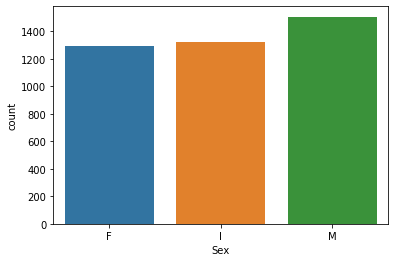

In [1118]:
sns.countplot(x='Sex', data=data)
pass

Поиск пропущенных значений

In [1119]:
data.isna().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [1120]:
data_raw.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


Убедились, что пропущенных значений нет.

Категориальные признаки закодируем с помощью числовых принаков (т.к. алгоритмы из библиотеки scikit-learn (почти) не умеют работать напрямую с категориальными признаками).

In [1121]:
data['Sex'] = pd.factorize(data['Sex'])[0]

In [1122]:
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


Перед применением алгоритмов машинного обучения количественные признаки полезно нормализовать.
Наиболее часто используют следующие способы:
1.приведение к отрезку $[0,1]$ - это линейное преобразование, приводящее все значения к заданному отрезку;
2.стандартизация - линейное преобразование, приводящее все значения к нулевому среднему и единичному стандартному отклонению.
Выполним стандартизацию всех признаков:

In [1123]:
data_stand = (data - data.mean(axis = 0))/data.std(axis = 0)

In [1124]:
data_stand.describe()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4.118000e+03,4.118000e+03,4.118000e+03,4.118000e+03,4.118000e+03,4.118000e+03,4.118000e+03,4.118000e+03,4.118000e+03
mean,4.185848e-16,-1.540455e-15,-1.479395e-14,2.165868e-14,-4.504626e-15,3.935981e-15,-3.887129e-15,5.702093e-16,6.163113e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.154122e+00,-3.062741e+00,-3.161825e+00,-3.420982e+00,-1.677321e+00,-1.615722e+00,-1.677895e+00,-1.715673e+00,-1.929151e+00
25%,-1.154122e+00,-6.484204e-01,-6.121121e-01,-6.066671e-01,-7.938525e-01,-7.870097e-01,-8.004078e-01,-7.924799e-01,-6.245170e-01
50%,5.490226e-02,1.707240e-01,1.684123e-01,5.140491e-03,-5.654126e-02,-1.056238e-01,-8.628271e-02,-3.479955e-02,-2.983583e-01
75%,1.263926e+00,7.743041e-01,7.407970e-01,6.169480e-01,6.729402e-01,6.534538e-01,6.698497e-01,6.382854e-01,3.539589e-01
max,1.263926e+00,1.938351e+00,2.145741e+00,2.423272e+01,4.173146e+00,4.567394e+00,3.685044e+00,5.640447e+00,3.941704e+00


Определим, сколько раз переменная Кол-во колец принимает то или иное значение

In [1125]:
data_raw.Rings.value_counts()

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
24      2
27      2
1       1
25      1
2       1
26      1
29      1
Name: Rings, dtype: int64

# Классификация

Заполняем модель: Х - данные без столбца Кол-во колец, Y - Кол-во колец

In [1126]:
X = data.drop('Rings', axis = 1) # выбрасываем столбец 'Rings'
y = data['Rings']
feature_names = X.columns

In [1127]:
type(feature_names)

pandas.core.indexes.base.Index

In [1128]:
feature_names

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight'],
      dtype='object')

In [1129]:
X = X.to_numpy()

In [1130]:
y

0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: Rings, Length: 4118, dtype: int64

In [1131]:
print(X.shape)
print(y.shape)
N, d = X.shape

(4118, 8)
(4118,)


Разобьем данные на обучающую и тестовую выборку в пропорции 2:1

In [1132]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

2882 1236


Одним из самых простых алгоритмов машинного обучения является алгоритм k ближайших соседей. Построение модели заключается в запоминании обучающего набора данных. Для того, чтобы сделать прогноз для новой точки данных, алгоритм находит ближайшие к ней точки обучающего набора, то есть находит «ближайших соседей».Затем точке тестового набора присваивается наиболее часто встречающийся класс (набравший большинство среди k ближайших соседей).

Метод К ближайших соседей (с числом соседей: 2,3,5,7,10,15,20,50,100,1000)

In [1133]:
from sklearn.neighbors import KNeighborsClassifier
neighbors_array = np.array([2,3,5,7,10,15,20,50,100,1000])
for i in range (10):
    knn = KNeighborsClassifier(n_neighbors = neighbors_array[i])
    knn.fit(X_train, y_train)
    y_test_predict = knn.predict(X_test)
    err_test  = np.mean(y_test  != y_test_predict)
    y_train_predict = knn.predict(X_train)
    err_train  = np.mean(y_train  != y_train_predict)
    print('neighbours =',neighbors_array[i],'err_train =',err_train,'err_test =', err_test)
    i=i+1

neighbours = 2 err_train = 0.4104788341429563 err_test = 0.7783171521035599
neighbours = 3 err_train = 0.48820263705759886 err_test = 0.7807443365695793
neighbours = 5 err_train = 0.5475364330326162 err_test = 0.767799352750809
neighbours = 7 err_train = 0.5763358778625954 err_test = 0.7621359223300971
neighbours = 10 err_train = 0.6186675919500347 err_test = 0.7645631067961165
neighbours = 15 err_train = 0.6391394864677308 err_test = 0.738673139158576
neighbours = 20 err_train = 0.655794587092297 err_test = 0.7483818770226537
neighbours = 50 err_train = 0.6894517696044413 err_test = 0.7451456310679612
neighbours = 100 err_train = 0.7113115891741846 err_test = 0.7411003236245954
neighbours = 1000 err_train = 0.7765440666204025 err_test = 0.8098705501618123


Наименьшая ошибка прогнозирования 0,738 для тестовой выборки наблюдается в случае, когда алгоритм рассматривает 15 ближайших соседей.
Наибольшая ошибка прогнозирования 0,809 для тестовой выборки наблюдается в случае, когда алгоритм рассматривает 1000 ближайших соседей.

Просмотр матрицы неточностей (confusion matrix) - способ оценки производительности классификатора. Общая идея заключается в том, чтобы подсчитать, сколько раз образцы класса А были отнесены к классу В. Каждая строка в матрице неточностей представляет фактический класс, а каждый столбец - спрогнозированный класс.Безупречный классификатор имел бы только истинно положительные и истинно отрицательные классификации, так что его матрица неточностей содержала бы ненулевые значения только на своей главной диагонали (от левого верхнего до правого нижнего угла).

In [1134]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_test_predict))

[[ 0  0  0  0 16  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1 40  4  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 75 13  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1 85 29  4  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1 72 66 15  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1 59 96 45  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  5 30 92 66  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 10 57 69  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  5 34 30  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  7 33 23  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  6 21 14  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  5 22 17  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  8 10  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  3 11  8  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  6  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  2  3  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  2  6  0  0  0  0  0  0

Support vector classifier – классификатор опорных векторов. Опорные вектора - точки, которые лежат на границе между классами. Важны для определения границы принятия решений. Чтобы получить прогноз для новой точки, измеряется расстояние до каждого опорного вектора. Классификационное решение принимается, исходя из расстояний до опорных векторов, а также важности опорных векторов, полученных в процессе обучения.

In [1135]:
gamma_mass=['scale','auto']

In [1137]:
from sklearn.svm import SVC
for i in range(2):
    svc_model = SVC(kernel = 'rbf',gamma=gamma_mass[i])
    svc_model.fit(X_train, y_train)
    err_train = np.mean(y_train != svc_model.predict(X_train))
    err_test = np.mean(y_test != svc_model.predict(X_test))
    print ('gamma =',gamma_mass[i],'err_train_SVC_rbf =',err_train,'err_test_SVC_rbf =', err_test)

gamma = scale err_train_SVC_rbf = 0.7321304649548924 err_test_SVC_rbf = 0.7572815533980582
gamma = auto err_train_SVC_rbf = 0.7508674531575295 err_test_SVC_rbf = 0.779126213592233


In [1138]:
svc_model = SVC(kernel = 'linear')
svc_model.fit(X_train, y_train)
err_train = np.mean(y_train != svc_model.predict(X_train))
err_test = np.mean(y_test != svc_model.predict(X_test))
print ('err_train_SVC_Lin =',err_train,'err_test_SVC_Lin =', err_test)

err_train_SVC_Lin = 0.7366412213740458 err_test_SVC_Lin = 0.7661812297734628


In [1139]:
for i in [2,3,4]:
    svc_model = SVC(kernel = 'poly',degree = i)
    svc_model.fit(X_train, y_train)
    err_train = np.mean(y_train != svc_model.predict(X_train))
    err_test = np.mean(y_test != svc_model.predict(X_test))
    print ('degree =',i,'err_train_SVC_Poly =',err_train,'err_test_SVC_Poly =', err_test)

degree = 2 err_train_SVC_Poly = 0.7342123525329632 err_test_SVC_Poly = 0.7653721682847896
degree = 3 err_train_SVC_Poly = 0.7251908396946565 err_test_SVC_Poly = 0.7597087378640777
degree = 4 err_train_SVC_Poly = 0.7165163081193615 err_test_SVC_Poly = 0.7435275080906149


Наименьшая ошибка прогнозирования 0,743 для тестовой выборки наблюдается в случае SVC_Poly degree = 4.
Наибольшая ошибка прогнозирования 0,779 для тестовой выборки наблюдается в случае SVC_rbf gamma = auto.

RandomForestClassifier

In [1140]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators = 500, max_depth = 8)
rf.fit(X_train, y_train)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))

print('err_train_forest =',err_train,'err_test_forest =', err_test)

err_train_forest = 0.40041637751561415 err_test_forest = 0.7233009708737864


Ошибка прогнозирования $RandomForestClassifier$ для тестовой выборки $0,723$.
Это лучший результат среди всех рассмотренных классификаторов.

Классификатор на основе метода стохастического градиентного спуска (Stochastic Gradient Descent - SGD) способен эффективно обрабатывать очень крупные наборы данных. Отчасти это связано с тем, что SGD использует обучающие образцы независимым образом по одному за раз.Класс SGDClassifier полагается на неупорядоченность во время обучения (отсюда и название метода "стохастический").

In [1141]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)
y_test_predict = sgd_clf.predict(X_test)
err_test  = np.mean(y_test  != y_test_predict)
y_train_predict = sgd_clf.predict(X_train)
err_train  = np.mean(y_train  != y_train_predict)
print('err_train =',err_train,'err_test =', err_test)

err_train = 0.7657876474670368 err_test = 0.7985436893203883


Ошибка прогнозирования SGDClassifier для тестовой выборки 0,798.

In [1142]:
sgd_clf.classes_

array([ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
       21, 22], dtype=int64)

In [1143]:
y_names = np.unique(y)
print(y_names)

[ 4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]


Применим PCA и LDA.transform для понижения размерности

## LDA

In [1144]:
from sklearn import discriminant_analysis
lda_model = discriminant_analysis.LinearDiscriminantAnalysis().fit(X_train, y_train)
y_train_pred = lda_model.predict(X_train)
y_test_pred  = lda_model.predict(X_test)
print('err_train = ',np.mean(y_train_pred != y_train),'err_test = ',np.mean(y_test_pred  != y_test))
#print(np.mean(y_test_pred  != y_test))

err_train =  0.7203331020124913 err_test =  0.7475728155339806


In [1145]:
lda_model = discriminant_analysis.LinearDiscriminantAnalysis(n_components = 2)
lda_model.fit(X_test, y_test)
X_lda = lda_model.transform(X_train)
X_lda

array([[-0.10375898, -0.98151924],
       [ 0.60306254, -1.33931557],
       [-0.03433072, -0.69198312],
       ...,
       [ 2.29257231,  4.32422159],
       [ 3.15427465,  3.73756493],
       [ 0.15226201, -2.01053763]])

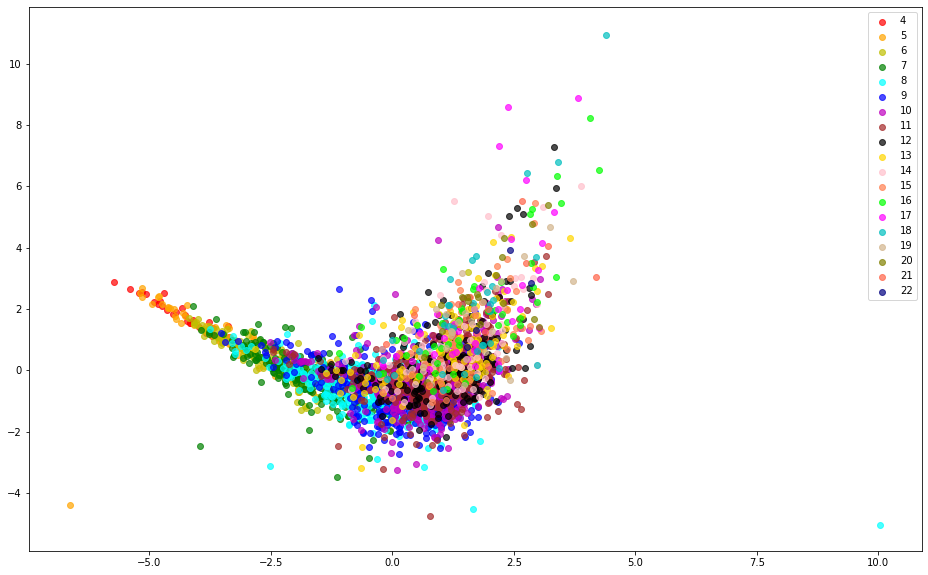

In [1146]:
colors = ['r', 'orange', 'y', 'g', 'aqua','b','m','brown','black','gold','pink','coral','lime','fuchsia','c','tan','olive','tomato','navy','peru','skyblue','hotpink','gray','khaki','firebrick','ivory']
plt.figure(figsize = (16,10))
for i in range(len(y_names)):
    plt.scatter(X_lda[y_train == y_names[i], 0], X_lda[y_train == y_names[i], 1], 
                color = colors[i], label = y_names[i], alpha = 0.7)
plt.legend()

In [1147]:
print ('n components', 'train error', 'test error')
for n_comp in range(1, len(feature_names)+1):
    lda_model = discriminant_analysis.LinearDiscriminantAnalysis(n_components = n_comp).fit(X_train, y_train)
    X_train_lda = lda_model.transform(X_train)
    X_test_lda  = lda_model.transform(X_test)
    lda_model = discriminant_analysis.LinearDiscriminantAnalysis().fit(X_train_lda, y_train)   
    y_train_pred = lda_model.predict(X_train_lda)
    y_test_pred  = lda_model.predict(X_test_lda)
    print ('      %s        %7.4f    %7.4f' % (n_comp, np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred)))

n components train error test error
      1         0.7401     0.7314
      2         0.7311     0.7346
      3         0.7214     0.7387
      4         0.7186     0.7354
      5         0.7235     0.7379
      6         0.7224     0.7492
      7         0.7200     0.7468
      8         0.7203     0.7476


In [1148]:
lda_model = discriminant_analysis.LinearDiscriminantAnalysis(n_components = 4)
lda_model.fit(X_test, y_test)
X_lda = lda_model.transform(X_train)
X_lda

array([[-0.10375898, -0.98151924,  0.86107389, -0.27576861],
       [ 0.60306254, -1.33931557, -1.33864962, -0.37733455],
       [-0.03433072, -0.69198312,  0.38779622, -0.01974618],
       ...,
       [ 2.29257231,  4.32422159,  1.68046352, -3.78046644],
       [ 3.15427465,  3.73756493,  1.97676388,  4.74779174],
       [ 0.15226201, -2.01053763, -0.59385637,  0.81928463]])

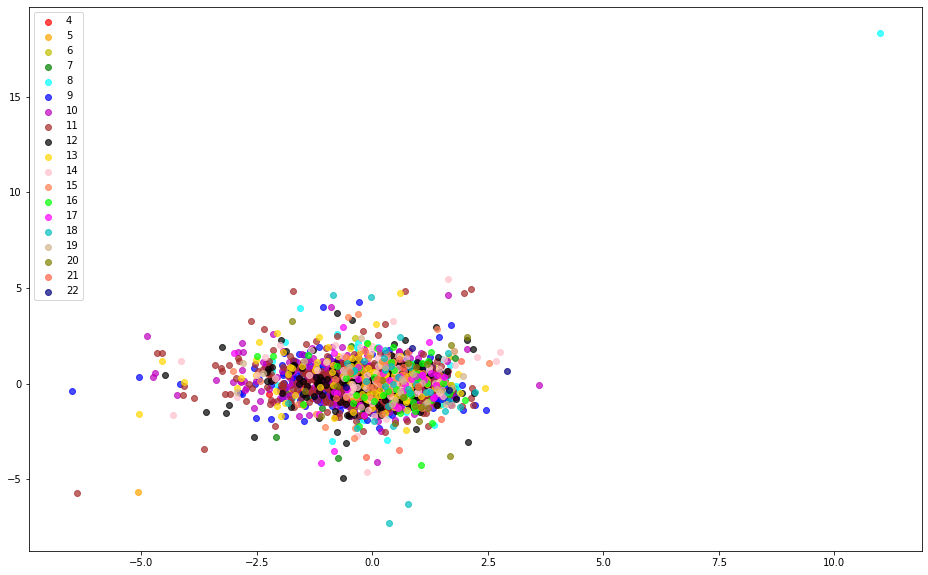

In [1149]:
colors = ['r', 'orange', 'y', 'g', 'aqua','b','m','brown','black','gold','pink','coral','lime','fuchsia','c','tan','olive','tomato','navy','peru','skyblue','hotpink','gray','khaki','firebrick','ivory']
plt.figure(figsize = (16,10))
for i in range(len(y_names)):
    plt.scatter(X_lda[y_train == y_names[i], 2], X_lda[y_train == y_names[i], 3], 
                color = colors[i], label = y_names[i], alpha = 0.7)
plt.legend()

In [1150]:
print ('n components', 'train error', 'test error')
for n_comp in range(1, len(feature_names)+1):
    lda_model = discriminant_analysis.LinearDiscriminantAnalysis(n_components = n_comp).fit(X_train, y_train)
    X_train_lda = lda_model.transform(X_train)
    X_test_lda  = lda_model.transform(X_test)
    svc = SVC(kernel = 'linear')
    svc.fit(X_train_lda, y_train)   
    y_train_pred = svc.predict(X_train_lda)
    y_test_pred  = svc.predict(X_test_lda)
    print ('      %s        %7.4f    %7.4f' % (n_comp, np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred)))

n components train error test error
      1         0.7474     0.7371
      2         0.7377     0.7322
      3         0.7332     0.7411
      4         0.7287     0.7443
      5         0.7266     0.7484
      6         0.7245     0.7371
      7         0.7231     0.7411
      8         0.7214     0.7395


In [1151]:
print ('n components', 'train error', 'test error')
neighbors_array = np.array([2,3,5,7,15])
acc_train = []
acc_test = []
for n_comp in range(1,len(feature_names)+1):
    lda_model = discriminant_analysis.LinearDiscriminantAnalysis(n_components = n_comp).fit(X_train, y_train)
    X_train_lda = lda_model.transform(X_train)
    X_test_lda  = lda_model.transform(X_test)
    for i in range(5):
        knn = KNeighborsClassifier(n_neighbors = neighbors_array[i])
        knn.fit(X_train_lda,  y_train)
        y_train_pred = knn.predict(X_train_lda)
        y_test_pred = knn.predict(X_test_lda)
        acc_train.append(np.mean(y_train != y_train_pred))
        acc_test.append(np.mean(y_test != y_test_pred))
        print('Neighbors =', neighbors_array[i])
        print ('      %3d        %7.4f    %7.4f' % (n_comp, np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred)))

n components train error test error
Neighbors = 2
        1         0.4101     0.7816
Neighbors = 3
        1         0.5111     0.8050
Neighbors = 5
        1         0.5725     0.7888
Neighbors = 7
        1         0.6031     0.7872
Neighbors = 15
        1         0.6697     0.7832
Neighbors = 2
        2         0.4032     0.7937
Neighbors = 3
        2         0.4917     0.7888
Neighbors = 5
        2         0.5614     0.7654
Neighbors = 7
        2         0.5881     0.7646
Neighbors = 15
        2         0.6485     0.7589
Neighbors = 2
        3         0.4056     0.7864
Neighbors = 3
        3         0.4851     0.8042
Neighbors = 5
        3         0.5448     0.7791
Neighbors = 7
        3         0.5774     0.7767
Neighbors = 15
        3         0.6305     0.7484
Neighbors = 2
        4         0.3904     0.7743
Neighbors = 3
        4         0.4709     0.7791
Neighbors = 5
        4         0.5382     0.7791
Neighbors = 7
        4         0.5819     0.7710
Neighbors =

In [1152]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators = 500, max_depth = 8)
rf.fit(X_train, y_train)
print ('n components', 'train error', 'test error')
for n_comp in range(1, len(feature_names)+1):
    lda_model = discriminant_analysis.LinearDiscriminantAnalysis(n_components = n_comp).fit(X_train, y_train)
    X_train_lda = lda_model.transform(X_train)
    X_test_lda  = lda_model.transform(X_test)
    rf = ensemble.RandomForestClassifier(n_estimators = 500, max_depth = 8)
    rf.fit(X_train_lda, y_train)
    y_train_pred = rf.predict(X_train_lda)
    y_test_pred  = rf.predict(X_test_lda)
    print ('      %s        %7.4f    %7.4f' % (n_comp, np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred)))

n components train error test error
      1         0.5573     0.7670
      2         0.4702     0.7508
      3         0.4240     0.7387
      4         0.4049     0.7322
      5         0.3876     0.7362
      6         0.3727     0.7298
      7         0.3734     0.7403
      8         0.3563     0.7460


## PCA

In [1153]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(X_test, y_test)

PCA(n_components=2)

In [1154]:
X_pca = pca.transform(X_train)

In [1155]:
y_names = np.unique(y)
len(y_names)

19

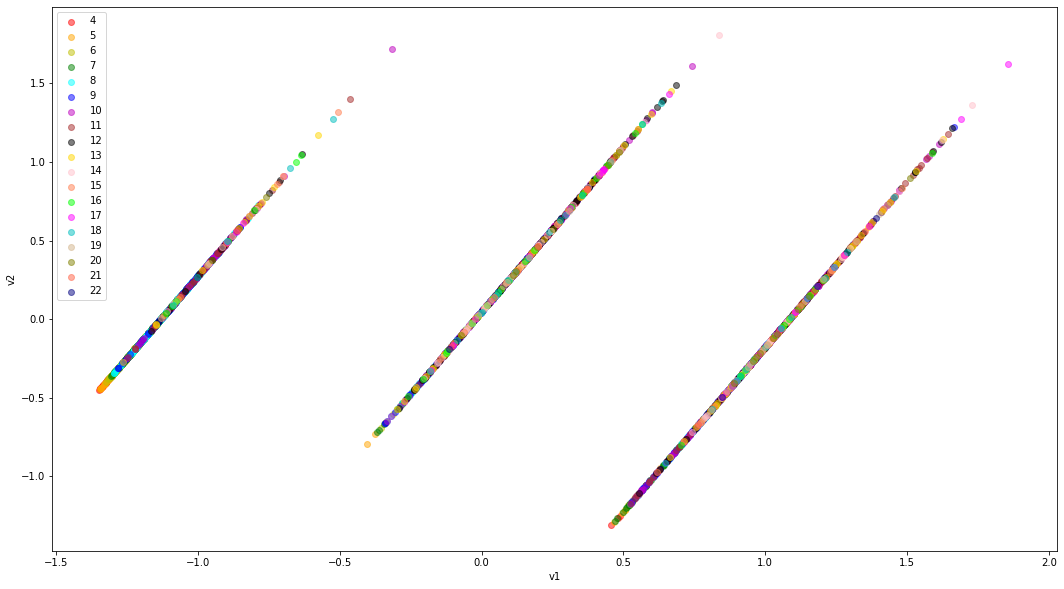

In [1156]:
colors = ['r', 'orange', 'y', 'g', 'aqua','b','m','brown','black','gold','pink','coral','lime','fuchsia','c','tan','olive','tomato','navy','peru','skyblue','hotpink','gray','khaki','firebrick','ivory']
plt.figure(figsize = (18, 10))
for i in range(len(y_names)):
    plt.scatter(X_pca[y_train == y_names[i], 0], X_pca[y_train == y_names[i], 1],
                color = colors[i], label = y_names[i], alpha = 0.5)
plt.xlabel('v1')
plt.ylabel('v2')
plt.legend();

In [1157]:
print ('n components', 'train error', 'test error')
acc_train = []
acc_test = []
for n_comp in range(1,len(feature_names)+1):
    pca = PCA(n_components = n_comp)
    pca.fit(X_train, y_train)
    X_train_pca = pca.transform(X_train)
    X_test_pca  = pca.transform(X_test)
    svc = SVC(kernel = 'linear')
    svc.fit(X_train_pca, y_train)   
    y_train_pred = svc.predict(X_train_pca)
    y_test_pred  = svc.predict(X_test_pca)
    acc_train.append(np.mean(y_train != y_train_pred))
    acc_test.append(np.mean(y_test != y_test_pred))
    print ('      %3d        %7.4f    %7.4f' % (n_comp, np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred)))

n components train error test error
        1         0.7894     0.8269
        2         0.7543     0.7856
        3         0.7412     0.7751
        4         0.7387     0.7646
        5         0.7380     0.7678
        6         0.7380     0.7670
        7         0.7363     0.7662
        8         0.7366     0.7662


In [1158]:
acc_train

[0.789382373351839,
 0.7543372657876475,
 0.7411519777931992,
 0.7387231089521166,
 0.738029146426093,
 0.738029146426093,
 0.7362942401110341,
 0.7366412213740458]

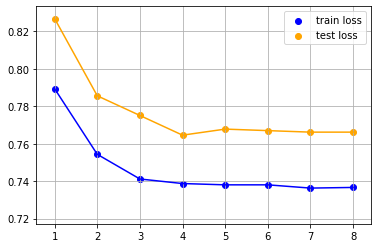

In [1159]:
plt.scatter(range(1,9), acc_train, label='train loss', color='blue')
plt.scatter(range(1,9), acc_test, label='test loss', color='orange')

plt.plot(range(1,9), acc_train, color='blue')
plt.plot(range(1,9), acc_test, color='orange')
plt.legend()
plt.grid()

In [1160]:
print ('n components', 'train error', 'test error')
neighbors_array = np.array([2,3,5,7,15])
acc_train = []
acc_test = []
for n_comp in range(1,len(feature_names)+1):
    pca = PCA(n_components = n_comp)
    pca.fit(X_train, y_train)
    X_train_pca = pca.transform(X_train)
    X_test_pca  = pca.transform(X_test)
    for i in range(5):
        knn = KNeighborsClassifier(n_neighbors = neighbors_array[i])
        knn.fit(X_train_pca,  y_train)
        y_train_pred = knn.predict(X_train_pca)
        y_test_pred = knn.predict(X_test_pca)
        acc_train.append(np.mean(y_train != y_train_pred))
        acc_test.append(np.mean(y_test != y_test_pred))
        print('Neighbors =', neighbors_array[i])
        print ('      %3d        %7.4f    %7.4f' % (n_comp, np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred)))

n components train error test error
Neighbors = 2
        1         0.4136     0.8034
Neighbors = 3
        1         0.5135     0.8074
Neighbors = 5
        1         0.5715     0.8155
Neighbors = 7
        1         0.6117     0.8058
Neighbors = 15
        1         0.6638     0.7791
Neighbors = 2
        2         0.4150     0.8010
Neighbors = 3
        2         0.5128     0.8147
Neighbors = 5
        2         0.5687     0.8050
Neighbors = 7
        2         0.6062     0.8074
Neighbors = 15
        2         0.6617     0.7735
Neighbors = 2
        3         0.4015     0.7807
Neighbors = 3
        3         0.4948     0.7824
Neighbors = 5
        3         0.5597     0.7775
Neighbors = 7
        3         0.5906     0.7840
Neighbors = 15
        3         0.6391     0.7443
Neighbors = 2
        4         0.3938     0.7646
Neighbors = 3
        4         0.4709     0.7743
Neighbors = 5
        4         0.5461     0.7727
Neighbors = 7
        4         0.5840     0.7597
Neighbors =

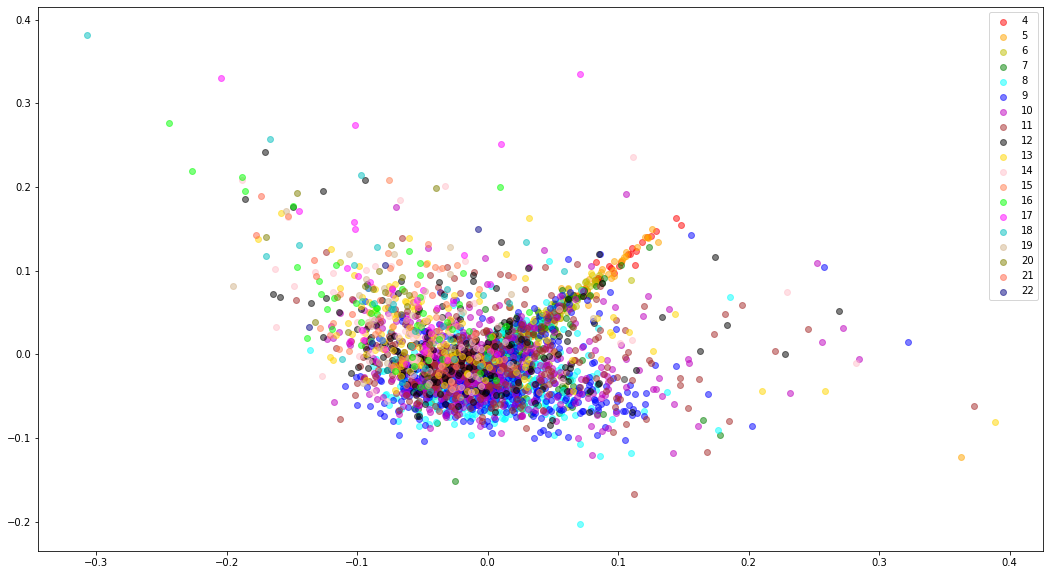

In [1161]:
pca = PCA(n_components = 4)
pca.fit(X_test, y_test)
X_pca = pca.transform(X_train)
y_names = np.unique(y)
colors = ['r', 'orange', 'y', 'g', 'aqua','b','m','brown','black','gold','pink','coral','lime','fuchsia','c','tan','olive','tomato','navy','peru','skyblue','hotpink','gray','khaki','firebrick','ivory']
plt.figure(figsize = (18, 10))
for i in range(len(y_names)):
    plt.scatter(X_pca[y_train == y_names[i], 2], X_pca[y_train == y_names[i], 3],
                color = colors[i], label = y_names[i], alpha = 0.5)
plt.legend();

In [1162]:
from sklearn import ensemble
#rf = ensemble.RandomForestClassifier(n_estimators = 500, max_depth = 8)
#rf.fit(X_train, y_train)
print ('n components', 'train error', 'test error')
for n_comp in range(1, len(feature_names)+1):
    pca = PCA(n_components = n_comp)
    pca.fit(X_train, y_train)
    X_train_pca = pca.transform(X_train)
    X_test_pca  = pca.transform(X_test)
    #lda_model = discriminant_analysis.LinearDiscriminantAnalysis(n_components = n_comp).fit(X_train, y_train)
    #X_train_lda = lda_model.transform(X_train)
    #X_test_lda  = lda_model.transform(X_test)
    rf = ensemble.RandomForestClassifier(n_estimators = 500, max_depth = 8)
    rf.fit(X_train_pca, y_train)
    y_train_pred = rf.predict(X_train_pca)
    y_test_pred  = rf.predict(X_test_pca)
    print ('      %s        %7.4f    %7.4f' % (n_comp, np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred)))

n components train error test error
      1         0.5958     0.7597
      2         0.5666     0.7565
      3         0.4552     0.7257
      4         0.4143     0.7225
      5         0.3931     0.7160
      6         0.3751     0.7314
      7         0.3570     0.7395
      8         0.3560     0.7273


PCA улучшил ошибку прогнозирования (RandomForestClassifier 0,716) 

In [1163]:
colors = ['r', 'orange', 'y', 'g', 'aqua','b','m','brown','black','gold','pink','coral','lime','fuchsia','c','tan','olive','tomato','navy','peru','skyblue','hotpink','gray','khaki','firebrick','ivory']